In [1]:
import pandas as pd
import random
import numpy as np
import os
import shutil
from PIL import Image
from matplotlib import pyplot as plt

# Connect to kaggle

In [2]:
# ! pip install -q kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"digantobhowmik","key":"a931c2ab0868083e6662823432cfc288"}'}

In [4]:
! mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

# Dog Breed Dataset

## Download Dataset

In [7]:
!kaggle competitions download -c dog-breed-identification

 99% 687M/691M [00:07<00:00, 140MB/s]
100% 691M/691M [00:07<00:00, 96.0MB/s]


## Unzip Dataset

In [8]:
! mkdir dog-breed-identification

In [ ]:
!unzip /content/dog-breed-identification.zip -d /content/dog-breed-identification

## Load Dataset

In [10]:
labels = pd.read_csv('/content/dog-breed-identification/labels.csv')

## Split Dataset into train and test

In [11]:
labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [12]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10222 entries, 0 to 10221
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10222 non-null  object
 1   breed   10222 non-null  object
dtypes: object(2)
memory usage: 159.8+ KB


In [13]:
#unique breed
breeds = labels['breed'].unique()
len(breeds)

120

In [14]:
breeds #list of breeds

array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
       'bedlington_terrier', 'borzoi', 'basenji', 'scottish_deerhound',
       'shetland_sheepdog', 'walker_hound', 'maltese_dog',
       'norfolk_terrier', 'african_hunting_dog',
       'wire-haired_fox_terrier', 'redbone', 'lakeland_terrier', 'boxer',
       'doberman', 'otterhound', 'standard_schnauzer',
       'irish_water_spaniel', 'black-and-tan_coonhound', 'cairn',
       'affenpinscher', 'labrador_retriever', 'ibizan_hound',
       'english_setter', 'weimaraner', 'giant_schnauzer', 'groenendael',
       'dhole', 'toy_poodle', 'border_terrier', 'tibetan_terrier',
       'norwegian_elkhound', 'shih-tzu', 'irish_terrier', 'kuvasz',
       'german_shepherd', 'greater_swiss_mountain_dog', 'basset',
       'australian_terrier', 'schipperke', 'rhodesian_ridgeback',
       'irish_setter', 'appenzeller', 'bloodhound', 'samoyed',
       'miniature_schnauzer', 'brittany_spaniel', 'kelpie', 'papillon',
       'borde

In [15]:
train_images = []
test_images = []
for i in range(len(breeds)):
  if(i < 105):
    train_images.extend(labels.loc[(labels['breed']==breeds[i]),'id'] + '.jpg')
  else:
    test_images.extend(labels.loc[(labels['breed']==breeds[i]),'id'] + '.jpg')

In [58]:
train_images[0]

'000bec180eb18c7604dcecc8fe0dba07.jpg'

In [16]:
print(len(train_images))
print(len(test_images))


8995
1227


There are total of 120 unique breeds present in the dataset. I have taken 105 breeds for training and 15 for testing resulting in 8995 dog images for training and 1227 dog images for testing.

In [17]:
train_folder = '/content/dog-breed-identification/train'
test_folder = '/content/dog-breed-identification/test'

### Check train images on test folder

In [18]:
flag = False
for train_name in train_images:
    test_path = os.path.join(test_folder, train_name)

    if os.path.exists(test_path):
        flag = True
message = "Found any" if flag else "Not found"
print(message)


Not found


### Check test images on test folder

In [19]:
flag = False
for test_name in test_images:
    test_path = os.path.join(test_folder, test_name)

    if os.path.exists(test_path):
        flag = True
message = "Found any" if flag else "Not found"
print(message)

Not found


## Create train dataset

In [20]:
# !rm -rf '/content/dogs-vs-cats'

In [21]:
if not os.path.exists("./dataset/train/dog"):
  os.makedirs("./dataset/train/dog")

for name in train_images:
  train_path = os.path.join(train_folder, name)

  if os.path.exists(train_path):
    D = os.path.join("./dataset/train/dog", name)
    shutil.copy(train_path,D)

In [54]:
train_dataset = '/content/dataset/train/'

In [53]:
image_files = [file for file in os.listdir(train_dataset + 'dog')]
# Count the number of image files
num_images = len(image_files)

print("Number of train images:", num_images)

Number of train images: 8995


### Display images

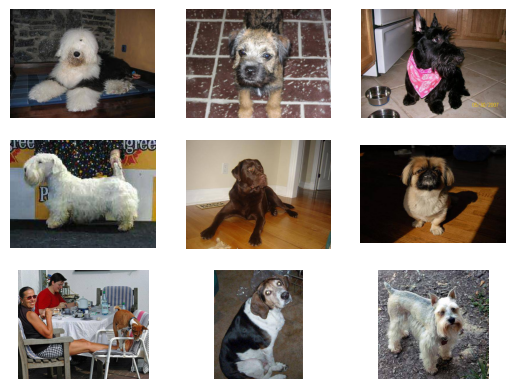

In [55]:
# Display 9 images from the image_files list
for i in range(9):
    image_path = os.path.join(train_dataset + 'dog', image_files[i])
    image = Image.open(image_path)

    plt.subplot(3, 3, i+1)  # Create a 2x5 grid of subplots
    plt.imshow(image)
    plt.axis('off')  # Turn off axis labels

plt.show()

## Create test dataset

In [25]:
if not os.path.exists("./dataset/test/dog"):
  os.makedirs("./dataset/test/dog")

for name in test_images:
  train_path = os.path.join(train_folder, name)

  if os.path.exists(train_path):
    D = os.path.join("./dataset/test/dog", name)
    shutil.copy(train_path,D)

In [50]:
test_dataset = '/content/dataset/test/'

test_image_files = [file for file in os.listdir(test_dataset + 'dog')]
# Count the number of image files
num_test_images = len(test_image_files)

print("Number of test images:", num_test_images)

Number of test images: 1227


### Display images

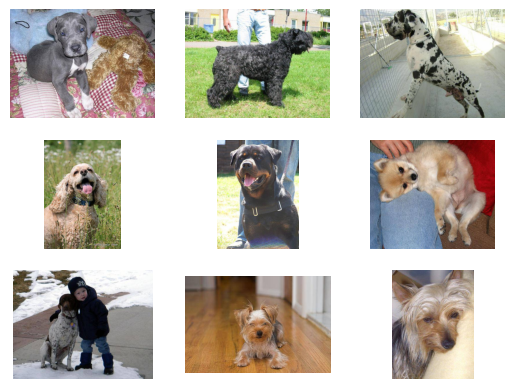

In [52]:
# Display 9 images from the image_files list
for i in range(9):
    image_path = os.path.join(test_dataset + 'dog', test_image_files[i])
    image = Image.open(image_path)

    plt.subplot(3, 3, i+1)  # Create a 2x5 grid of subplots
    plt.imshow(image)
    plt.axis('off')  # Turn off axis labels

plt.show()

# Dog vs Cat dataset
I take only cat's images from this dataset

## Download Dataset

In [28]:
! kaggle competitions download -c dogs-vs-cats

 98% 798M/812M [00:05<00:00, 190MB/s]
100% 812M/812M [00:05<00:00, 143MB/s]


## Process Dataset

In [29]:
! mkdir dogs-vs-cats

In [30]:
!unzip /content/dogs-vs-cats.zip -d /content/dogs-vs-cats

Archive:  /content/dogs-vs-cats.zip
  inflating: /content/dogs-vs-cats/sampleSubmission.csv  
  inflating: /content/dogs-vs-cats/test1.zip  
  inflating: /content/dogs-vs-cats/train.zip  


In [ ]:
!unzip /content/dogs-vs-cats/train.zip -d /content/dogs-vs-cats/

## Split dataset into train and test
I have taken equal 8995 cat images for training and rest 3505 for testing.

In [32]:
cat_train_folder = '/content/dogs-vs-cats/train'

In [33]:
cat_images = [file for file in os.listdir(cat_train_folder) if file.split('.')[0] == 'cat']
len(cat_images)

12500

In [34]:
cat_train_images = cat_images[:8995]
cat_test_images = cat_images[8995:]
print(len(cat_train_images))
print(len(cat_test_images))


8995
3505


## Create train dataset for cat

In [35]:
if not os.path.exists("./dataset/train/cat"):
  os.makedirs("./dataset/train/cat")

for name in cat_train_images:
  train_path = os.path.join(cat_train_folder, name)

  if os.path.exists(train_path):
    D = os.path.join("./dataset/train/cat", name)
    shutil.copy(train_path,D)

In [46]:
image_files = [file for file in os.listdir(train_dataset + 'cat')]
# Count the number of image files
num_images = len(image_files)

print("Number of train images:", num_images)

Number of train images: 8995


### Display images

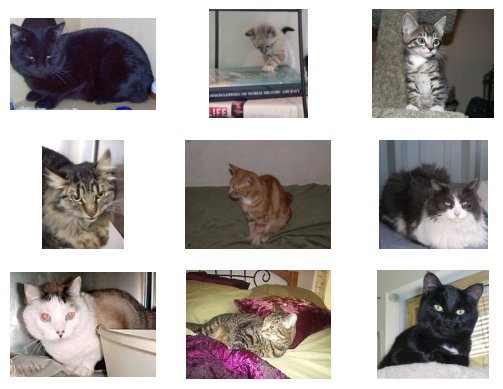

In [47]:
# Display 9 images from the image_files list
for i in range(9):
    image_path = os.path.join(train_dataset + 'cat', image_files[i])
    image = Image.open(image_path)

    plt.subplot(3, 3, i+1)  # Create a 2x5 grid of subplots
    plt.imshow(image)
    plt.axis('off')  # Turn off axis labels

plt.show()

## Create test dataset for cat

In [38]:
if not os.path.exists("./dataset/test/cat"):
  os.makedirs("./dataset/test/cat")

for name in cat_test_images:
  train_path = os.path.join(cat_train_folder, name)

  if os.path.exists(train_path):
    D = os.path.join("./dataset/test/cat", name)
    shutil.copy(train_path,D)

In [39]:
image_files = [file for file in os.listdir(test_dataset + 'cat')]
# Count the number of image files
num_images = len(image_files)

print("Number of train images:", num_images)

Number of train images: 3505


### Display images

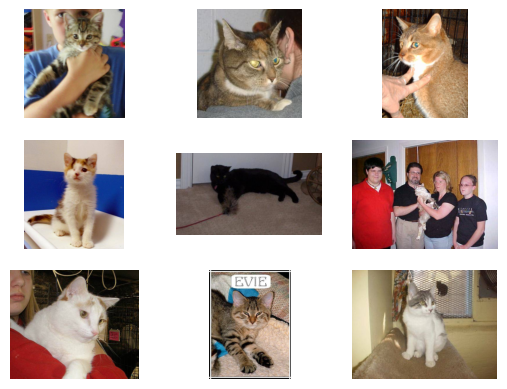

In [45]:
# Display 9 images from the image_files list
for i in range(9):
    image_path = os.path.join(test_dataset + 'cat', image_files[i])
    image = Image.open(image_path)

    plt.subplot(3, 3, i+1)  # Create a 2x5 grid of subplots
    plt.imshow(image)
    plt.axis('off')  # Turn off axis labels

plt.show()

# Classic Dogs vs. Cats problem in Deep Learning with a twist

# Step 1: Data Collection

1. Access the Kaggle dataset for "Dog Breed Identification" competition: https://www.kaggle.com/c/dog-breed-identification
2. Download all dog images and store them in a directory called "dog-breed-identification".
3. Access the Kaggle dataset for "Dogs vs. Cats" competition: https://www.kaggle.com/c/dogs-vs-cats
4. Download all cat images and store them in a directory called "dogs-vs-cats".

# Step 2: Label Information

1. Obtain the label information from the "label.csv" file in the "Dog Breed Identification" dataset.
2. This file contains dog breed labels corresponding to each image.

# Step 3: Dog Breed Separation

1. Analyze the label information to identify unique dog breeds present in the dataset.
2. Divide the unique dog breeds into two list training and testing.

# Step 4: Organize Dog Images by Breed

1. For each breed in the training, move the corresponding images from the "dog-breed-identification" directory to the "dataset/train/dog" directory.

2. For each breed in the testing, move the corresponding images from the "dog-breed-identification" directory to the "dataset/test/dog" directory.

# Step 5: Cat Image Separation

1. Take only cat images from "dogs-vs-cats" dataset.
2. Divide the cat images into training and testing.
3. Number of cat images is 12500. I have taken 8995 cat images for training and rest 3505 for testing.

# Step 6: Organize Cat Images

1. For each images in the training, move the corresponding images from the "dogs-vs-cats" directory to the "dataset/train/cat" directory.

2. For each breed in the testing, move the corresponding images from the "dogs-vs-cats" directory to the "dataset/test/cat" directory.

# Step 7: Final Dataset Structure

- dataset
  - train
    - dog
      - ...images
    - cat
      - ...images
  - test
    - dog
      - ...images
    - cat
      - ...images

